In [1]:
import scipy
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import tensorflow as tf

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

%matplotlib inline 

In [2]:
tf.random.set_seed(456)

In [3]:
dataframe = pd.read_csv("AAPL_3Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (777, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.658726,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.426846,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,52.178062,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.972744,132314800
2018-10-22,54.947498,55.840000,54.735001,55.162498,53.296410,115168400
2018-10-23,53.957500,55.812500,53.674999,55.682499,53.798817,155071200
2018-10-24,55.650002,56.057499,53.634998,53.772499,51.953426,163702000
2018-10-25,54.427502,55.345001,54.187500,54.950001,53.091099,119423200
2018-10-26,53.974998,55.047501,53.167500,54.075001,52.245701,189033600


<function matplotlib.pyplot.show(close=None, block=None)>

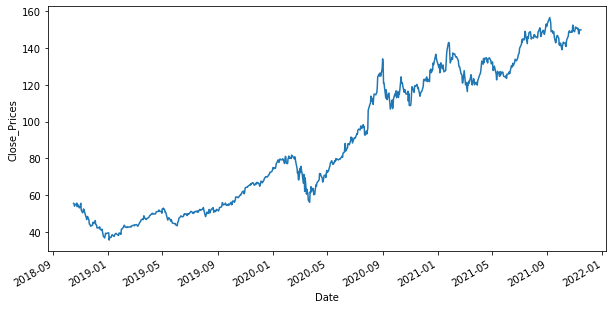

In [4]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

Dimension of train data:  (543, 6)
Dimension of test data:  (234, 6)


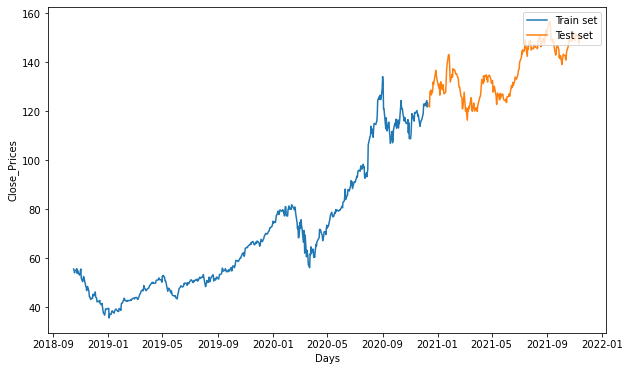

In [5]:
# Split train data and test data
training_size = int(len(dataframe)*0.7)
train_dataset, test_dataset = dataframe.iloc[:training_size], dataframe.iloc[training_size:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [6]:
#Split train data for X and Y
train_dataset = train_dataset.reset_index().drop('Date',axis = 1)

X_train = train_dataset.drop(['Close','Adj Close'], axis = 1)
Y_train = train_dataset[['Close']]

#Split test data for X and Y
test_dataset = test_dataset.reset_index().drop('Date',axis = 1)

X_test = test_dataset.drop(['Close','Adj Close'], axis = 1)
Y_test = test_dataset[['Close']]

print(X_train)
print(Y_test)

           Open        High         Low     Volume
0     54.732498   55.747501   54.189999  116736000
1     55.575001   55.660000   54.834999   91541600
2     54.465000   54.935001   53.250000  130325200
3     54.514999   55.314999   54.357498  132314800
4     54.947498   55.840000   54.735001  115168400
..          ...         ...         ...        ...
538  122.599998  122.860001  121.519997   78260400
539  122.309998  124.570000  122.250000   86712000
540  124.370003  124.980003  123.089996   82225500
541  124.529999  125.949997  121.000000  115089200
542  120.500000  123.870003  120.150002   81312200

[543 rows x 4 columns]
          Close
0    122.410004
1    121.779999
2    127.879997
3    127.809998
4    128.699997
..          ...
229  150.809998
230  147.919998
231  147.869995
232  149.990005
233  150.000000

[234 rows x 1 columns]


In [7]:
#Different scaler for input and output
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(Y_train)

#Apply the scaler to training data
X_train_normalize = input_scaler.transform(X_train)
Y_train_normalize = output_scaler.transform(Y_train)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_test = scaler_x_test.fit(X_test)
output_scaler_test = scaler_y_test.fit(Y_test)

#Apply the scaler to test data
X_test_normalize = input_scaler_test.transform(X_test)
Y_test_normalize = output_scaler_test.transform(Y_test)



print('X_train_normalize.shape:', X_train_normalize.shape)
print('Y_train_normalize.shape:', Y_train_normalize.shape)
print('X_test_normalize.shape:', X_test_normalize.shape)
print('Y_test_normalize.shape:', Y_test_normalize.shape)

X_train_normalize.shape: (543, 4)
Y_train_normalize.shape: (543, 1)
X_test_normalize.shape: (234, 4)
Y_test_normalize.shape: (234, 1)


In [8]:
print('X_train_normalize:\n', X_train_normalize)
print('Y_train_normalize:\n', Y_train_normalize)
print('X_test_normalize:\n', X_test_normalize)
print('Y_test_normalize:\n', Y_test_normalize)

X_train_normalize:
 [[0.18443328 0.19022651 0.19667473 0.18707717]
 [0.19272605 0.18936485 0.20346206 0.12096089]
 [0.1818003  0.18222552 0.18678312 0.22273856]
 ...
 [0.86987555 0.87198431 0.9217089  0.09651317]
 [0.87145039 0.88153619 0.89971589 0.18275556]
 [0.83178309 0.86105373 0.89077137 0.09411644]]
Y_train_normalize:
 [[0.20267152]
 [0.20023827]
 [0.18713407]
 [0.19547309]
 [0.19886953]
 [0.20414163]
 [0.18477682]
 [0.19671509]
 [0.18784378]
 [0.17755305]
 [0.18023979]
 [0.1943325 ]
 [0.20284897]
 [0.16548804]
 [0.15055888]
 [0.15608447]
 [0.17174866]
 [0.16804807]
 [0.15785872]
 [0.13175171]
 [0.12683445]
 [0.11307126]
 [0.12475605]
 [0.13012952]
 [0.11068867]
 [0.08818086]
 [0.08767394]
 [0.07629329]
 [0.08219906]
 [0.08123591]
 [0.09821814]
 [0.09469496]
 [0.09223633]
 [0.10805264]
 [0.08744583]
 [0.08245254]
 [0.0666616 ]
 [0.06947509]
 [0.06701646]
 [0.06820776]
 [0.07289685]
 [0.05903225]
 [0.05512889]
 [0.06052773]
 [0.04739816]
 [0.03710744]
 [0.02164599]
 [0.01176082]


In [9]:
# Create a 3D input 
def create_3D_dataset(X,Y, time_steps=1):
    X_dataset = []
    Y_dataset = []
    for i in range (len(X) - time_steps):
        V = X[i:i+time_steps,:]
        X_dataset.append(V)
        Y_dataset.append(Y[i+time_steps])
    return np.array(X_dataset), np.array(Y_dataset)

time_Steps = 30

X_test, Y_test = create_3D_dataset(X_test_normalize, Y_test_normalize, time_Steps)

X_train, Y_train = create_3D_dataset(X_train_normalize, Y_train_normalize, time_Steps)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape', X_test.shape)
print('Y_test.shape', Y_test.shape)

X_train.shape: (513, 30, 4)
Y_train.shape: (513, 1)
X_test.shape (204, 30, 4)
Y_test.shape (204, 1)


In [10]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional


def create_LSTM_model(units):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences=True,input_shape=[X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #Compile model
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

LSTM_model = create_LSTM_model(64)

In [11]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    #early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    record = model.fit(X_train, Y_train, epochs = 200, validation_split = 0.2, batch_size = 64,
                      shuffle = False)
    return record


print("\n\nLSTM_record")
LSTM_record = fit_model(LSTM_model)



LSTM_record
Epoch 1/200
7/7 [==============================] - 5s 166ms/step - loss: 0.0090 - val_loss: 0.0571
Epoch 2/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0086 - val_loss: 0.0220
Epoch 3/200
7/7 [==============================] - 0s 30ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 4/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 5/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 6/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 7/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 8/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0022 - val_loss: 0.0076
Epoch 9/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 10/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0015 - val_loss: 0.0068
Epoc

7/7 [==============================] - 0s 59ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 84/200
7/7 [==============================] - 0s 64ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 85/200
7/7 [==============================] - 0s 55ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 86/200
7/7 [==============================] - 0s 62ms/step - loss: 9.0551e-04 - val_loss: 0.0037
Epoch 87/200
7/7 [==============================] - 0s 61ms/step - loss: 9.4590e-04 - val_loss: 0.0030
Epoch 88/200
7/7 [==============================] - 0s 60ms/step - loss: 9.9018e-04 - val_loss: 0.0030
Epoch 89/200
7/7 [==============================] - 0s 55ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 90/200
7/7 [==============================] - 0s 52ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 91/200
7/7 [==============================] - 0s 61ms/step - loss: 9.7379e-04 - val_loss: 0.0032
Epoch 92/200
7/7 [==============================] - 0s 57ms/step - loss: 8.4866e-04 - val_loss: 0.0032
Epo

7/7 [==============================] - 0s 58ms/step - loss: 7.8062e-04 - val_loss: 0.0026
Epoch 163/200
7/7 [==============================] - 0s 58ms/step - loss: 6.7620e-04 - val_loss: 0.0025
Epoch 164/200
7/7 [==============================] - 0s 59ms/step - loss: 8.1296e-04 - val_loss: 0.0026
Epoch 165/200
7/7 [==============================] - 0s 58ms/step - loss: 8.2268e-04 - val_loss: 0.0026
Epoch 166/200
7/7 [==============================] - 0s 58ms/step - loss: 7.6940e-04 - val_loss: 0.0025
Epoch 167/200
7/7 [==============================] - 0s 57ms/step - loss: 8.3200e-04 - val_loss: 0.0027
Epoch 168/200
7/7 [==============================] - 0s 58ms/step - loss: 8.1424e-04 - val_loss: 0.0029
Epoch 169/200
7/7 [==============================] - 0s 58ms/step - loss: 7.5280e-04 - val_loss: 0.0025
Epoch 170/200
7/7 [==============================] - 0s 55ms/step - loss: 9.7716e-04 - val_loss: 0.0031
Epoch 171/200
7/7 [==============================] - 0s 57ms/step - loss: 8.70

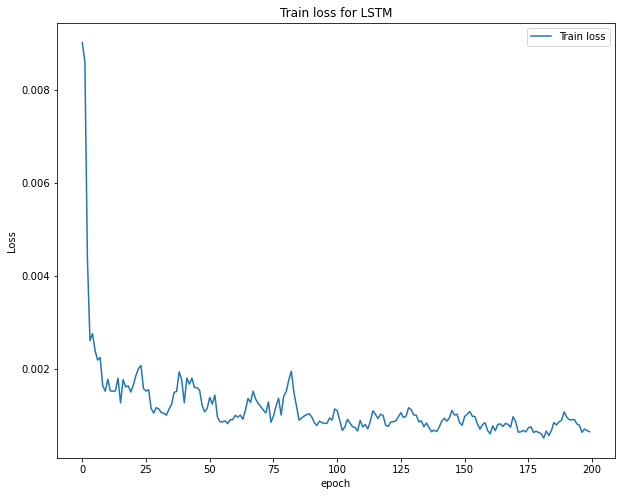

In [12]:
# Flot train loss and validation loss
def plot_loss (record,model_name):
    plt.figure(figsize = (10,8))
    plt.plot(record.history['loss'])
    #plt.plot(record.history['val_loss'])
    plt.title('Train loss for '+ model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss','Validation Loss'], loc='upper right')
    
#plot_loss(BidirecLSTM_record,'Bidirectional_LSTM')
plot_loss(LSTM_record,'LSTM')

In [13]:
# Make Prediction
def predict(model):
    prediction = model.predict(X_test)
    prediction = scaler_y_test.inverse_transform(prediction)
    return prediction

prediction_of_LSTM = predict(LSTM_model)
prediction_of_LSTM.shape

(204, 1)

In [14]:
Y_test_read = scaler_y_test.inverse_transform(Y_test) 
Y_train_read = scaler_y.inverse_transform(Y_train)

print("Actual Value\n")
print(Y_test_read)
print("\nPrediction\n")
print(prediction_of_LSTM)

Actual Value

[[142.059998]
 [137.089996]
 [131.960007]
 [134.139999]
 [134.990005]
 [133.940002]
 [137.389999]
 [136.759995]
 [136.910004]
 [136.009995]
 [135.389999]
 [135.130005]
 [135.369995]
 [133.190002]
 [130.839996]
 [129.710007]
 [129.869995]
 [126.      ]
 [125.860001]
 [125.349998]
 [120.989998]
 [121.260002]
 [127.790001]
 [125.120003]
 [122.059998]
 [120.129997]
 [121.419998]
 [116.360001]
 [121.089996]
 [119.980003]
 [121.959999]
 [121.029999]
 [123.989998]
 [125.57    ]
 [124.760002]
 [120.529999]
 [119.989998]
 [123.389999]
 [122.540001]
 [120.089996]
 [120.589996]
 [121.209999]
 [121.389999]
 [119.900002]
 [122.150002]
 [123.      ]
 [125.900002]
 [126.209999]
 [127.900002]
 [130.360001]
 [133.      ]
 [131.240005]
 [134.429993]
 [132.029999]
 [134.5     ]
 [134.160004]
 [134.839996]
 [133.110001]
 [133.5     ]
 [131.940002]
 [134.320007]
 [134.720001]
 [134.389999]
 [133.580002]
 [133.479996]
 [131.460007]
 [132.539993]
 [127.849998]
 [128.100006]
 [129.740005]
 [130.

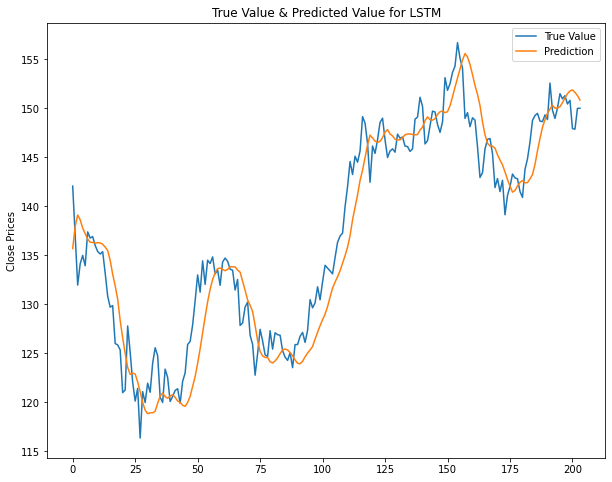

In [15]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
#plot_result(prediction_of_BidirectionLSTM, Y_test_read, 'BidirectionLSTM')
plot_result(prediction_of_LSTM, Y_test_read, 'LSTM')

In [16]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read, prediction_of_LSTM, "3-year",'Multivariate LSTM') 

This prediction model is: Multivariate LSTM
The size of dataset is: 3-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 10.2574
Root Mean Square Error (RMSE) = 3.2027
Mean Absolute Error (MAE)     = 2.5461
+-----------------------------+--------+
